# PROBLEM STATEMENT OF **`SENTIMENTAL ANALYSIS`**

> ## *3.2*  Build a **`sentiment analysis`** model to analyze **customer `reviews` and `feedback`** for a `hospitality` company. The model should be able to *neutral*, and identify key topics or areas of concern.

## Expected Solution

> ## 1. Two PPT slides or a two-pager document outlining the solution approach.

> ## 2. Model selection (e.g., time series models, regression, ensemble methods)

> ## 3. Solution architecture (e.g., cloud-based deployment, on-premises deployment)

> ## 4. Short video or screenshot demonstrating the model's output. Source code and deployment steps.

# Step-by-Step Implemantation

!["BUILT IN FUNCTION"](https://monkeylearn.com/static/348bb1d70089176ca2f61ea402094382/50bf7/main.png)

## 1. Importing Labaries & Tool's 

In [222]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Import the pyplot module from Matplotlib
import matplotlib.pyplot as plt

# Import the seaborn
import seaborn as sns

## 2. Data Collection

In [223]:
Data = pd.read_csv(r"tripadvisor_hotel_reviews.csv")

In [224]:
Data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [225]:
Data.shape

(20491, 2)

In [226]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [227]:
Data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [228]:
Data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [229]:
Data.dropna()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [230]:
data_2 = Data[["Rating","Review"]]

In [231]:
data_2

,Rating,Review
0,4,nice hotel expensive parking got good deal sta...
1,2,ok nothing special charge diamond member hilto...
2,3,nice rooms not 4* experience hotel monaco seat...
3,5,"unique, great stay, wonderful time hotel monac..."
4,5,"great stay great stay, went seahawk game aweso..."
...,...,...
20486,5,"best kept secret 3rd time staying charm, not 5..."
20487,4,great location price view hotel great quick pl...
20488,2,"ok just looks nice modern outside, desk staff ..."
20489,1,hotel theft ruined vacation hotel opened sept ...


In [232]:
data_2.isnull().sum()

Rating    0
Review    0
dtype: int64

In [233]:
data_2.Rating.value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [234]:
Abse = data_2['Rating'].value_counts()
Abse.values

array([9054, 6039, 2184, 1793, 1421], dtype=int64)

## 3. Data Preprocess

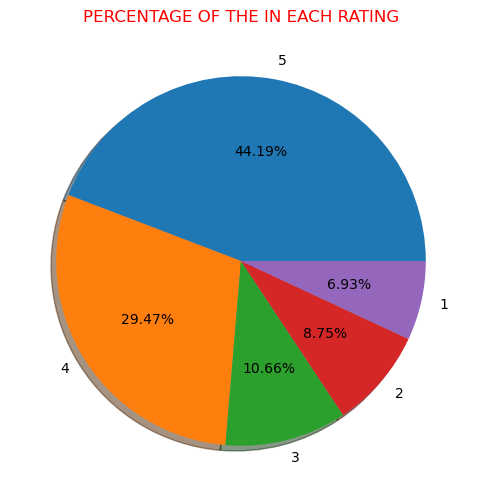

In [235]:
# Import the pyplot module from Matplotlib

plt.figure(figsize = (6,6))
# labels: labels for each wedges
# autopct: format of the percentage labels
# shadow: Adds s shadow to the pie-Chart
plt.pie(x = Abse, labels = Abse.index, autopct = "%1.2f%%", shadow = True)
plt.title("PERCENTAGE OF THE IN EACH RATING", color = "red")
plt.show()

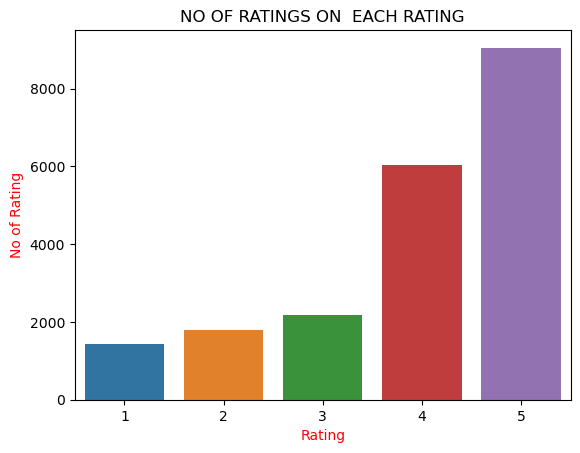

In [236]:
import seaborn as sns
sns.countplot(data=Data,x="Rating")
plt.title("NO OF RATINGS ON  EACH RATING")
plt.xlabel("Rating", color = "red")
plt.ylabel("No of Rating", color = "red")
plt.show()

In [237]:
data_2['Rating'] = data_2['Rating'].apply(lambda x: "Negative" if x <=3 else 'postive')

In [238]:
data_2.isnull().sum()

Rating    0
Review    0
dtype: int64

In [239]:
y = data_2.pop('Rating')
x = data_2
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=45)

In [240]:
y.shape

(20491,)

In [241]:
x.shape

(20491, 1)

## 

In [242]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 

In [243]:
## Initialize the In-Built stemmer
stemmer = PorterStemmer()
# We Can Also use Lemmatizer Instead of stemmer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm,tqdm_notebook
tqdm.pandas()


def preprocess(raw_text,flag):

    # removings Special Characters and Digits
    sentence =  re.sub("[^a-zA-Z]"," ", str(raw_text))
    sentence = sentence.replace("READ MORE","")

    # Change sentences to lower case
    sentence = sentence.lower()

    # Tokenize into words
    tokens = sentence.split()

    # Remove STOP-WORDS
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == "stem"):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]

    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series(["".join(clean_tokens),len(clean_tokens)])



In [244]:
## Now you can use "Progress_map" instead of `apply`
# And "Progress_map" instead of `map`

temp_data = X_train["Review"].progress_apply(lambda text: preprocess(text,flag="lemma"))

temp_data.shape

100%|████████████████████████████████████████████████████████████████████████████| 14343/14343 [12:55<00:00, 18.49it/s]


(14343, 2)

In [245]:
## Now you can use "Progress_map" instead of `apply`
# And "Progress_map" instead of `map`

temp_data_test = x_test["Review"].progress_apply(lambda text: preprocess(text,flag="lemma"))

temp_data_test.shape

100%|██████████████████████████████████████████████████████████████████████████████| 6148/6148 [05:28<00:00, 18.69it/s]


(6148, 2)

In [246]:
temp_data_test.columns = ["Review_Text_Clean","Review_Text_Len"]

In [247]:
temp_data.columns = ["Review_Text_Clean","Review_Text_Len"]

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
vacab = TfidfVectorizer()
X_train_tfidf = vacab.fit_transform(temp_data["Review_Text_Clean"])

In [249]:
vacab

TfidfVectorizer()

In [250]:
X_test_tfidf = vacab.transform(temp_data_test["Review_Text_Clean"])

In [251]:
X_train_tfidf

<14343x14343 sparse matrix of type '<class 'numpy.float64'>'
	with 14343 stored elements in Compressed Sparse Row format>

In [252]:
X_test_tfidf

<6148x14343 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [253]:
print(X_test_tfidf)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=2, metric="minkowski")

In [255]:
classifier.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [256]:
classifier.fit(X_train_tfidf,y_train) 
y_pred = classifier.predict(X_test_tfidf)
y_pred

array(['postive', 'postive', 'postive', ..., 'postive', 'postive',
       'postive'], dtype=object)

In [257]:
from sklearn.metrics import classification_report,accuracy_score
a = classification_report(y_test,y_pred)

In [258]:
y_test

13363     postive
18883     postive
13778     postive
8328      postive
15009     postive
           ...   
3910     Negative
6582      postive
13193     postive
14796    Negative
7688      postive
Name: Rating, Length: 6148, dtype: object

In [259]:
print(a)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1641
     postive       0.73      1.00      0.85      4507

    accuracy                           0.73      6148
   macro avg       0.37      0.50      0.42      6148
weighted avg       0.54      0.73      0.62      6148



In [260]:
accuracy_score(y_test,y_pred)

0.7330839297332465

In [261]:
from sklearn.naive_bayes import MultinomialNB
Nb = MultinomialNB()
Nb.fit(X_train_tfidf,y_train)
y_pred_nb = Nb.predict(X_test_tfidf)
y_pred_nb

array(['postive', 'postive', 'postive', ..., 'postive', 'postive',
       'postive'], dtype='<U8')

In [262]:
from sklearn.metrics import classification_report,accuracy_score
a = classification_report(y_test,y_pred_nb)
print(a)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1641
     postive       0.73      1.00      0.85      4507

    accuracy                           0.73      6148
   macro avg       0.37      0.50      0.42      6148
weighted avg       0.54      0.73      0.62      6148



In [263]:
accuracy_score(y_test,y_pred_nb)

0.7330839297332465

In [264]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_tfidf, y_train)
y_test_pred = classifier.predict(X_test_tfidf)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.7330839297332465
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1641
     postive       0.73      1.00      0.85      4507

    accuracy                           0.73      6148
   macro avg       0.37      0.50      0.42      6148
weighted avg       0.54      0.73      0.62      6148



In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Define parameter grids for each algorithm
param_grids = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
            # Add other Decision Tree parameters
        }
    },
    'Logistic': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
            # Add other Logistic Regression parameters
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
            # Add other SVM parameters
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [2, 5, 10],
            # Add other Random Forest parameters
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 10],
            'p': [1, 2, 3]
            # Add other KNN parameters
        }
    }
}
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
# Define a list to store results
results = []

# Perform GridSearchCV for each algorithm
for algo_name, config in tqdm(param_grids.items(), desc="Grid Search Progress"):
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        scoring='accuracy',
        cv=5,
        verbose=1
    )
    grid_search.fit(X_train_tfidf, y_train)  # Assuming X_train and y_train are your training data
    
    # Append results
    results.append({
        'algorithm': algo_name,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
    })

    print(f'Score on Test Data: {algo_name} ', grid_search.score(X_test_tfidf, y_test))

# Print results
for result in results:
    print(f"Best parameters for {result['algorithm']}: {result['best_params']}")
    print(f"Best score for {result['algorithm']}: {result['best_score']}")


Grid Search Progress:   0%|                                                                      | 0/5 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Grid Search Progress:  20%|████████████▏                                                | 1/5 [05:34<22:19, 334.84s/it]

Score on Test Data: DecisionTree  0.7330839297332465
Fitting 5 folds for each of 6 candidates, totalling 30 fits


Grid Search Progress:  40%|████████████████████████▍                                    | 2/5 [05:36<06:55, 138.65s/it]

Score on Test Data: Logistic  0.7330839297332465
Fitting 5 folds for each of 6 candidates, totalling 30 fits


Grid Search Progress:  60%|████████████████████████████████████▌                        | 3/5 [09:48<06:21, 190.75s/it]

Score on Test Data: SVM  0.7330839297332465
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Grid Search Progress:  80%|████████████████████████████████████████████████▊            | 4/5 [12:44<03:04, 184.61s/it]

Score on Test Data: RandomForest  0.7330839297332465
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Grid Search Progress: 100%|█████████████████████████████████████████████████████████████| 5/5 [12:54<00:00, 154.81s/it]

Score on Test Data: KNN  0.7330839297332465
Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best score for DecisionTree: 0.7380603896896221
Best parameters for Logistic: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic: 0.7380603896896221
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best score for SVM: 0.7380603896896221
Best parameters for RandomForest: {'max_depth': 2, 'n_estimators': 100}
Best score for RandomForest: 0.7380603896896221
Best parameters for KNN: {'n_neighbors': 3, 'p': 2}
Best score for KNN: 0.7380603896896221


In [267]:
DF = pd.DataFrame(results)

In [268]:
DF

,algorithm,best_params,best_score
0,DecisionTree,"{'max_depth': None, 'min_samples_split': 2}",0.73806
1,Logistic,"{'C': 0.1, 'penalty': 'l2'}",0.73806
2,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.73806
3,RandomForest,"{'max_depth': 2, 'n_estimators': 100}",0.73806
4,KNN,"{'n_neighbors': 3, 'p': 2}",0.73806


In [271]:
algorithms = ["DecisionTree","Logistic","SVM","RandomForest","KNN"]
best_scores = [0.7,0.74,0.734,0.744,0.73806]

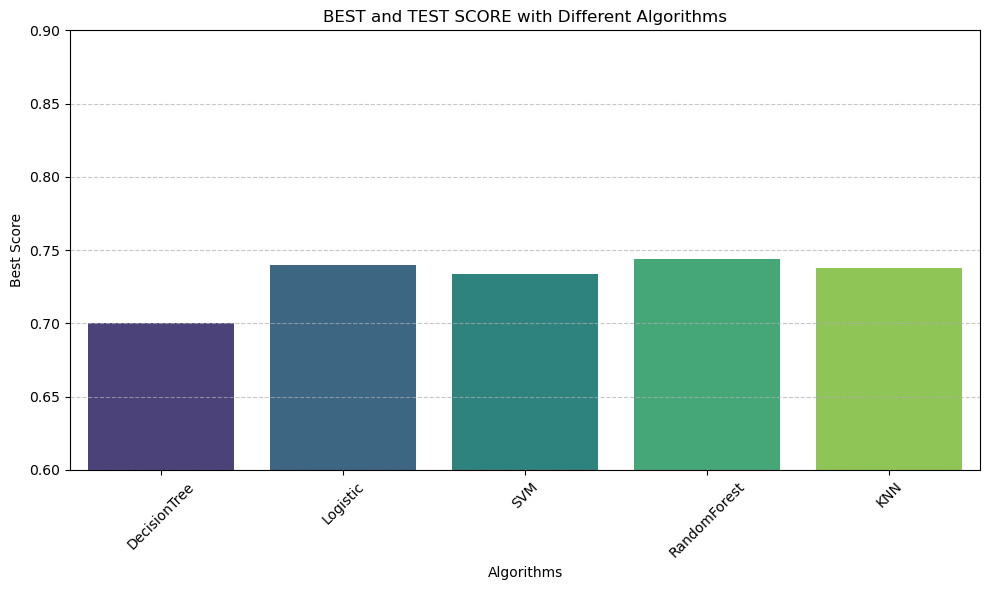

In [272]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=algorithms,y=best_scores,palette="viridis")
plt.xlabel("Algorithms")
plt.ylabel("Best Score")
plt.title("BEST and TEST SCORE with Different Algorithms")
plt.ylim(0.6,0.9)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()